<a href="https://colab.research.google.com/github/Rezakmz/Dimension_Reduction_Feature_Selection_Hotel_Dataset/blob/main/Notebooks/Dimentions_Reduction_Feature_Selection_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

In [ ]:
# loading data
file_path = "/content/hotel_bookings.csv"
full_data = pd.read_csv(file_path)

In [ ]:
# first 5 rows
full_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# missing data
full_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# filling the missing data based on intuitive knowledge
nan_replacements = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}
full_data_cln = full_data.fillna(nan_replacements)

# "undefined" and "SC" are the same
full_data_cln["meal"].replace("Undefined", "SC", inplace=True)

# removing the rows with no guests
zero_guests = list(full_data_cln.loc[full_data_cln["adults"]
                   + full_data_cln["children"]
                   + full_data_cln["babies"]==0].index)
full_data_cln.drop(full_data_cln.index[zero_guests], inplace=True)

In [ ]:
# final shape
full_data_cln.shape

(119210, 32)

# EDA

In [ ]:
# After cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included.
rh = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel") & (full_data_cln["is_canceled"] == 0)]
ch = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel") & (full_data_cln["is_canceled"] == 0)]

In [ ]:
# country of the guests who did not cancell
country_data = pd.DataFrame(full_data_cln.loc[full_data_cln["is_canceled"] == 0]["country"].value_counts())
# determining the percentage
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# plotting the pie chart
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# showing the geogrophical distribution of the guests
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"],
                    hover_name=country_data.index,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

In [ ]:
# calculating the rate of price per person
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

<ipython-input-10-f5d495f3be62>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-f5d495f3be62>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("""The average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

The average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


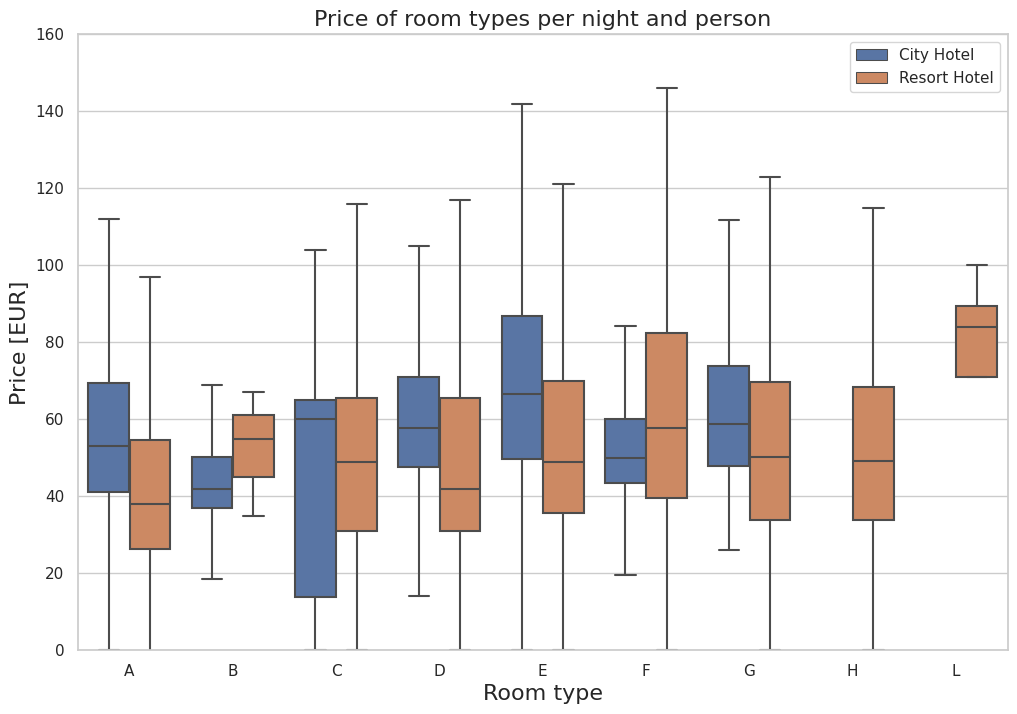

In [ ]:
# Calculation of the price per person per night based on the type of room
full_data_cln["adr_pp"] = full_data_cln["adr"] / (full_data_cln["adults"] + full_data_cln["children"])
full_data_guests = full_data_cln.loc[full_data_cln["is_canceled"] == 0]
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# Draw a box plot for prices
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

<ipython-input-13-ea34345d4d0e>:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




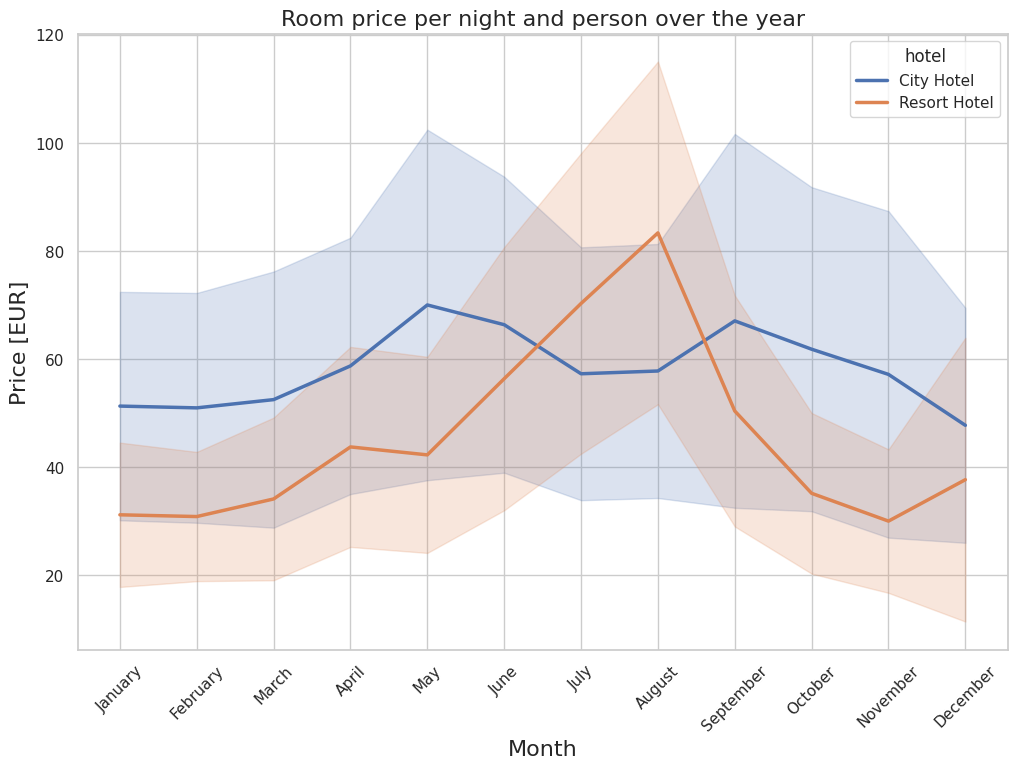

In [ ]:
# Sort the data based on the month of arrival at the hotel
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# Define the order of the months of the year
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# Draw a bar graph with standard deviation for each month
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly,
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

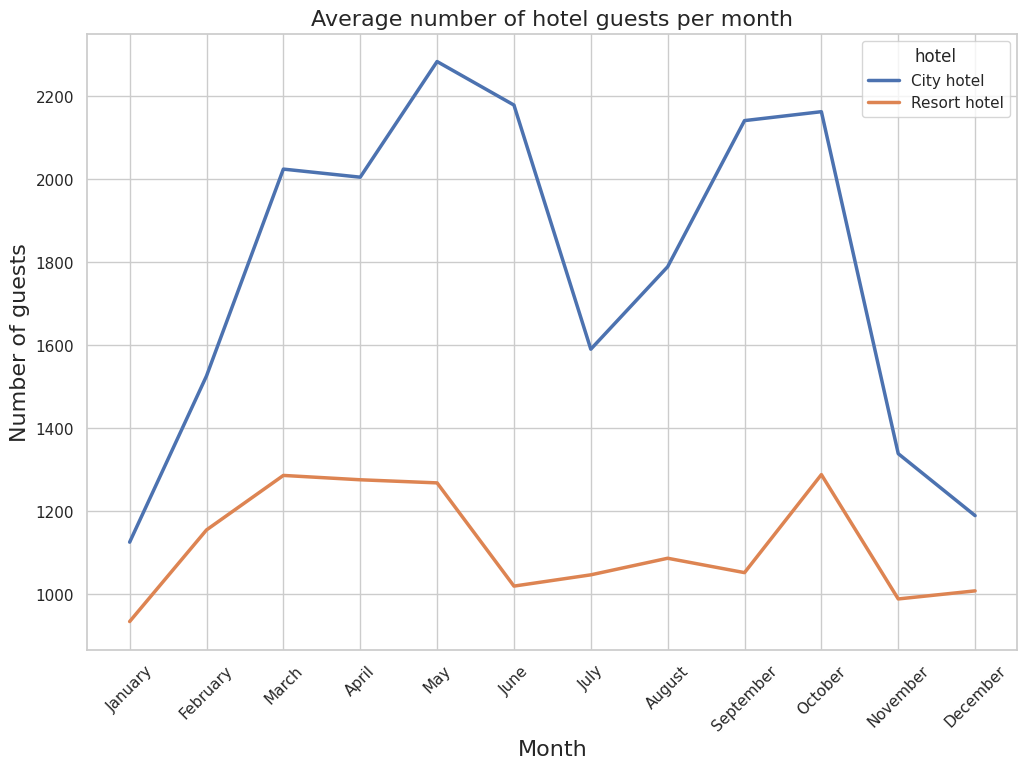

In [ ]:
# Data grouping by month
# Create a dataframe for grouped data
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel",
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel",
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# Sort by the order of the Gregorian months
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Since the information of August and July has been available for 3 years
# If we have 2 years of data for the remaining months
# We normalize by dividing the data by 3 and 2
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

# Display the number of guests of each hotel in different months
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data,
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

<ipython-input-15-9584740b19cb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-9584740b19cb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



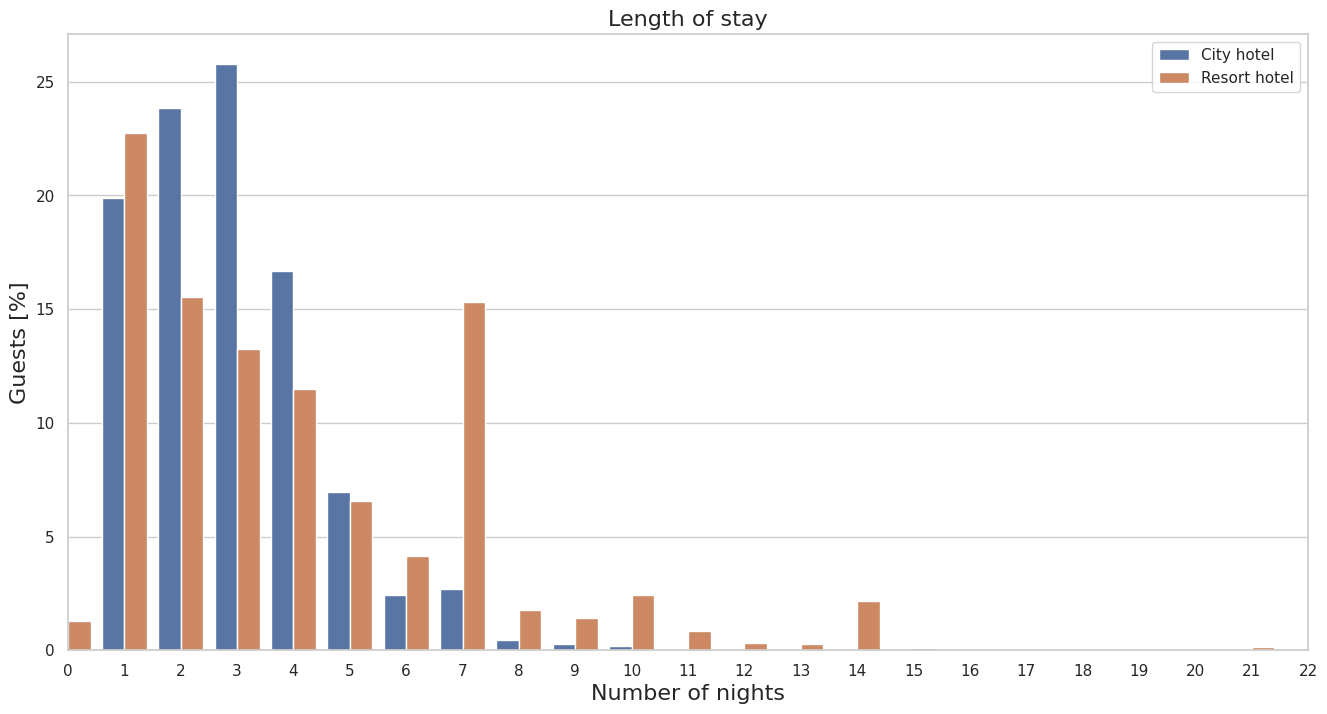

In [ ]:
# Building a data frame to draw graphs of the length of stay
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

# Calculate the total length of stay for a resort hotel
num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100

# Calculate the total length of stay for an urban hotel
num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

# Drawing the mode distribution of residence time
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [ ]:
# Calculate the average and maximum length of stay for two types of hotels
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))
print(f"On average, guests of the City hotel stay {avg_nights_cty:.2f} nights, and {cty_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.92 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


In [ ]:
# Counting values for different types of reservations (values for canceled ones are also calculated)
segments=full_data_cln["market_segment"].value_counts()

# Draw a pie chart
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

<ipython-input-18-defdbfbdd77a>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




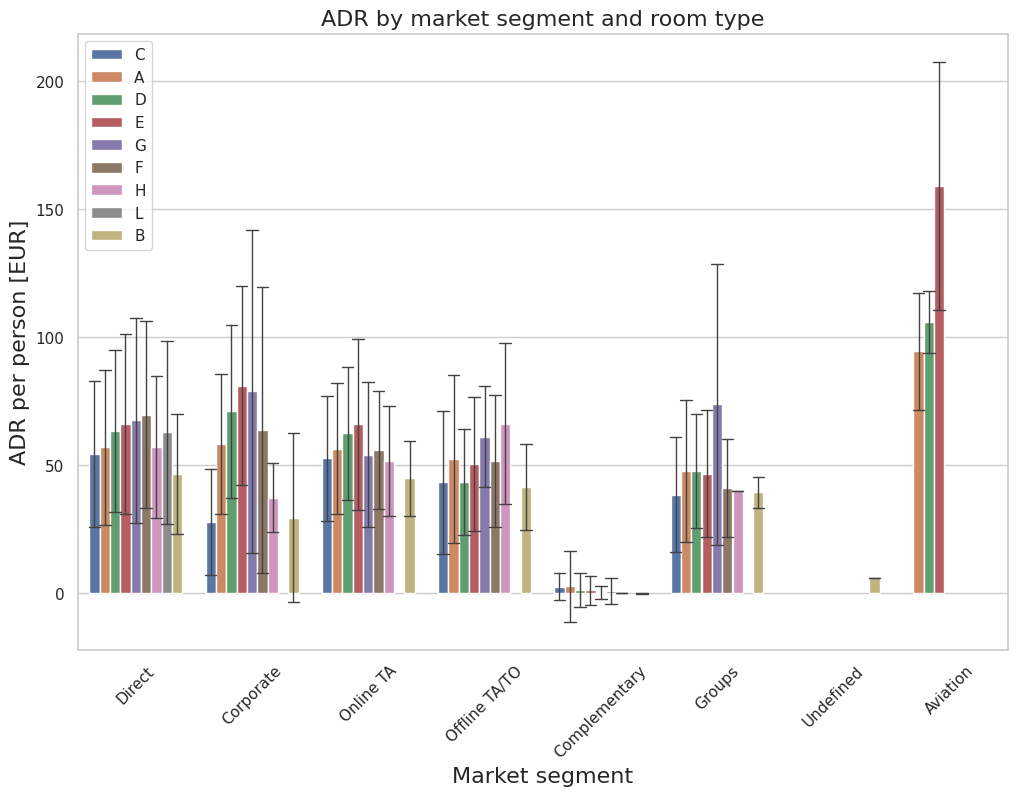

In [ ]:
# Get the hotel price rate per person per night based on the type of reservation
# Draw a bar chart with error bar
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=full_data_cln,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Explore to find higher rates for airlines
# Creating a special dataframe for these guests
Airline_data = full_data_cln.loc[full_data_cln["market_segment"]== "Aviation"][["is_canceled",
                                                                                "adults",
                                                                                "lead_time",
                                                                                "adr_pp",]].describe()

Non_Airline_data = full_data_cln.loc[full_data_cln["market_segment"]!= "Aviation"][["is_canceled",
                                                                                    "adults",
                                                                                    "lead_time",
                                                                                    "adr_pp",]].describe()

In [ ]:
Airline_data

,is_canceled,adults,lead_time,adr_pp
count,235.000000,235.000000,235.00000,235.000000
mean,0.221277,1.012766,4.47234,100.270979
std,0.415992,0.112503,4.61629,20.376689
min,0.000000,1.000000,0.00000,0.000000
25%,0.000000,1.000000,1.00000,95.000000
50%,0.000000,1.000000,3.00000,95.000000
75%,0.000000,1.000000,6.00000,110.000000
max,1.000000,2.000000,23.00000,193.500000


In [ ]:
Non_Airline_data

,is_canceled,adults,lead_time,adr_pp
count,118975.000000,118975.000000,118975.000000,118975.000000
mean,0.371061,1.860878,104.306031,55.036835
std,0.483091,0.574499,106.888885,29.017596
min,0.000000,0.000000,0.000000,-3.190000
25%,0.000000,2.000000,18.000000,37.440000
50%,0.000000,2.000000,69.000000,49.500000
75%,1.000000,2.000000,161.000000,66.000000
max,1.000000,55.000000,737.000000,2700.000000


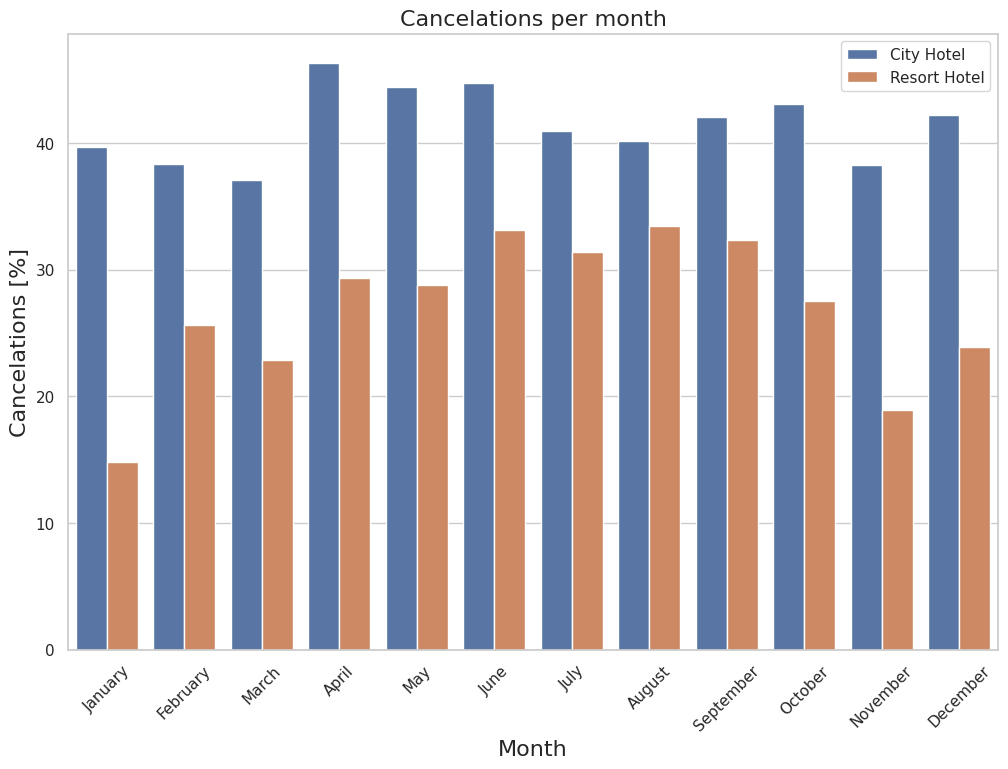

In [ ]:
# Creating a dataframe for canceled reservations in different months
res_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# Sort the data according to the order of the Gregorian months
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# Draw a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

# Data Reduction

## PCA

In [ ]:
full_data_cln.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# First, we code string data
# The date column is also removed due to the presence of month and day
full_data_cln. drop('reservation_status_date', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Use coding
le = LabelEncoder()

# Selecting columns with string values
categorical_columns = full_data_cln.select_dtypes(include=['object']).columns

# Apply the encoder to each column
for col in categorical_columns:
    full_data_cln[col] = le.fit_transform(full_data_cln[col])

In [ ]:
from sklearn.decomposition import PCA

y = full_data_cln['reservation_status']
X = full_data_cln.drop(['reservation_status', 'is_canceled'], axis=1)
pca = PCA(n_components=2)  # Reduce dimensions to two numbers
reduced_data_pca = pca.fit_transform(X)

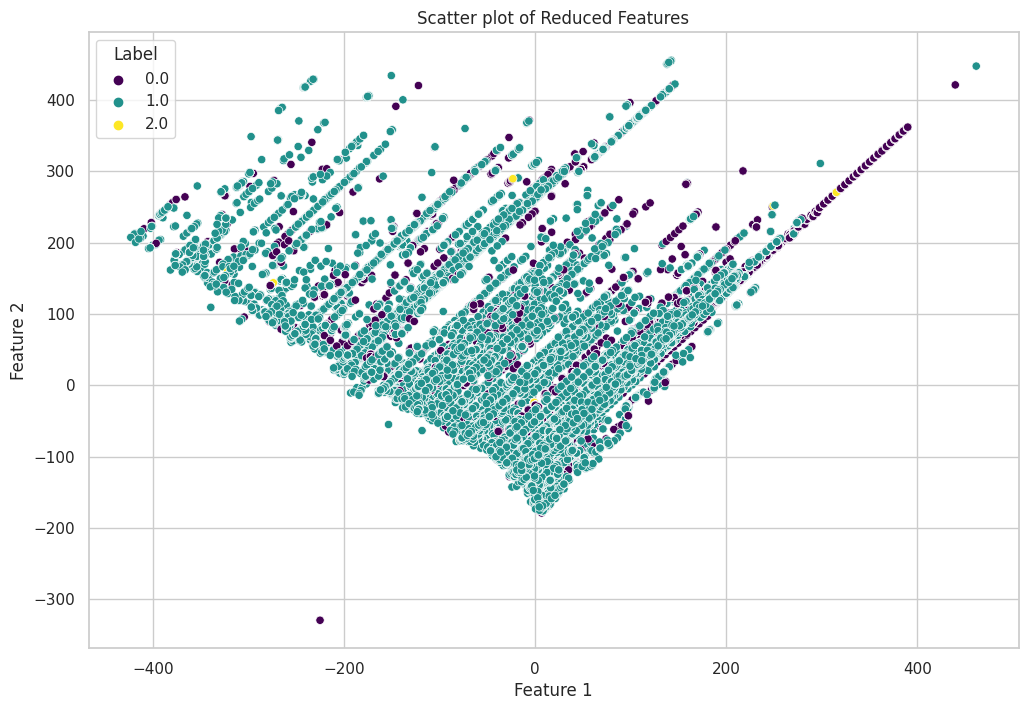

In [ ]:
import seaborn as sns

# Draw a diagram for reduced dimensions
# Build dataframe from PCA output
data = pd.DataFrame(reduced_data_pca, columns=['Feature 1', 'Feature 2'])
data['Label'] = y

# Draw a diagram based on new features
plt.figure(figsize=(12,8))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Label', data=data, palette='viridis')
plt.title('Scatter plot of Reduced Features')
plt.show()

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
reduced_data_lda = lda.fit_transform(X, y)

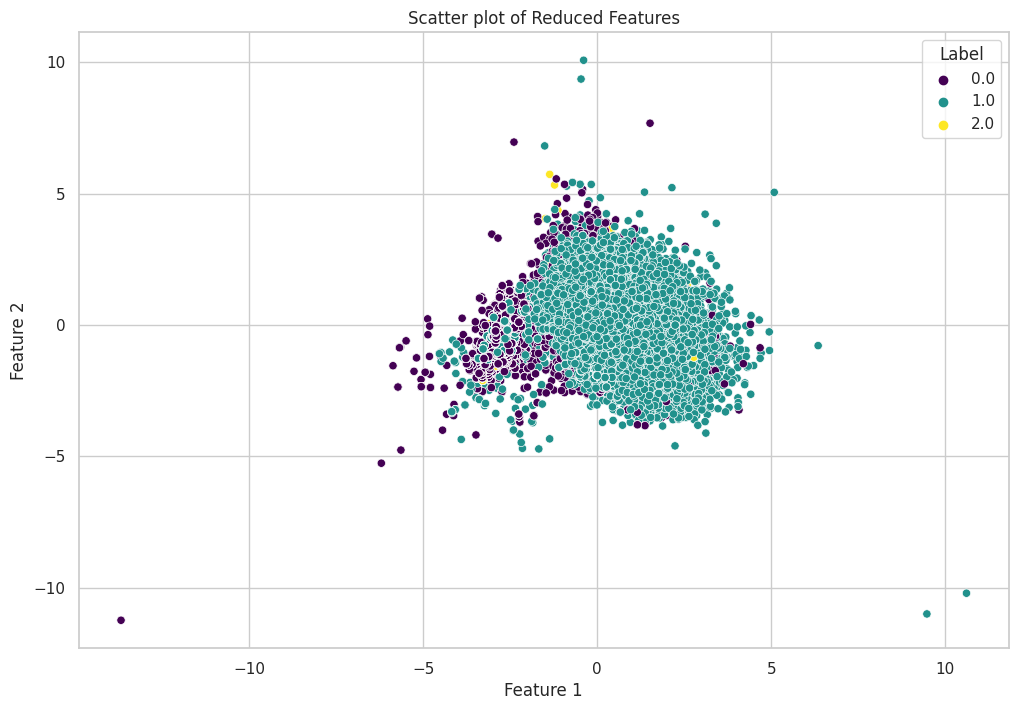

In [ ]:
import seaborn as sns

# Draw a diagram for reduced dimensions
# Build dataframe from LDA output
data = pd.DataFrame(reduced_data_lda, columns=['Feature 1', 'Feature 2'])
data['Label'] = y

# Draw a diagram based on new features
plt.figure(figsize=(12,8))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Label', data=data, palette='viridis')
plt.title('Scatter plot of Reduced Features')
plt.show()

## TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(X)

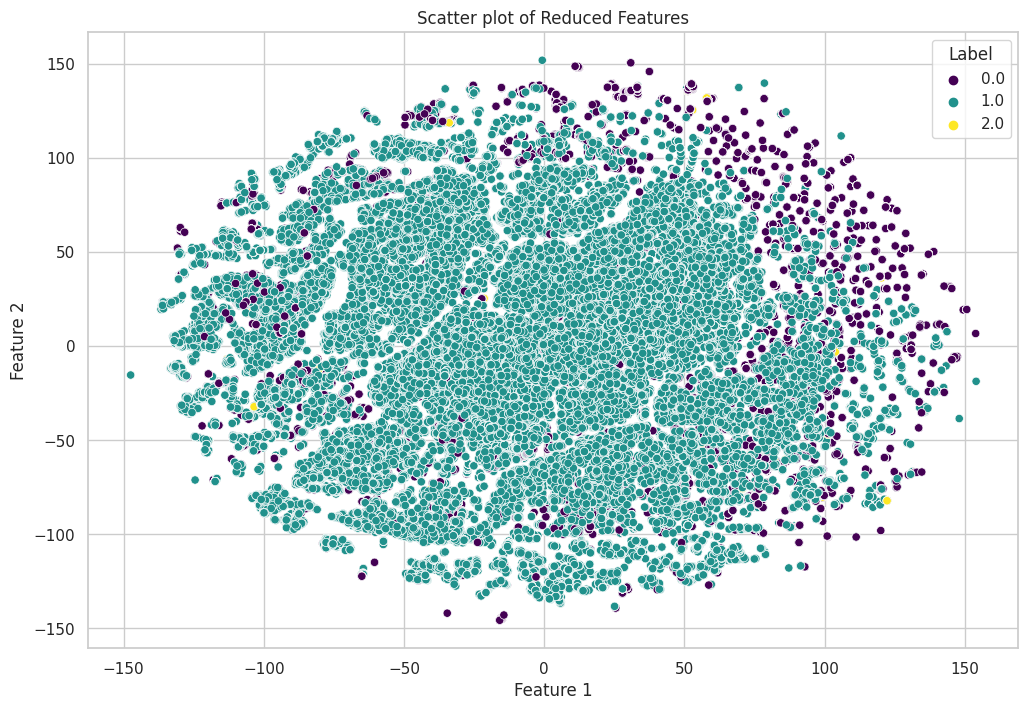

In [ ]:
import seaborn as sns

# Draw a diagram for reduced dimensions
# Build dataframe from LDA output
data = pd.DataFrame(reduced_data_tsne, columns=['Feature 1', 'Feature 2'])
data['Label'] = y

# Draw a diagram based on new features
plt.figure(figsize=(12,8))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Label', data=data, palette='viridis')
plt.title('Scatter plot of Reduced Features')
plt.show()

# Feature Selection

## Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Data normalization
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Use chi2 to select 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_norm,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Display the most important features
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(10,'Score')['Specs'])  # print 10 best features

21                   deposit_type
1                       lead_time
0                           hotel
28      total_of_special_requests
12                        country
19             assigned_room_type
15              is_repeated_guest
27    required_car_parking_spaces
16         previous_cancellations
23                        company
Name: Specs, dtype: object


## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X_norm, y)

# Get the output of the RFE method
selected_features_mask = fit.support_

# Specify the name of the most important features based on the RFE output
selected_columns = X.columns[selected_features_mask]

print("Selected Features:")
print(selected_columns)

Selected Features:
Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_week_nights', 'country', 'market_segment', 'deposit_type',
       'agent', 'adr', 'total_of_special_requests'],
      dtype='object')


## Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the RandomForest model
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Data training
clf.fit(X_norm, y)

# Determining the importance of features based on model output
importances = clf.feature_importances_

# Creating an array based on the importance of features
f_importances = pd.Series(importances, X.columns)

# Sort features by importance
f_importances.sort_values(ascending=False, inplace=True)

In [ ]:
f_importances[0:10]

lead_time                    0.126282
deposit_type                 0.119317
country                      0.108601
adr                          0.074127
total_of_special_requests    0.057468
arrival_date_day_of_month    0.053056
agent                        0.052388
arrival_date_week_number     0.049622
market_segment               0.048322
previous_cancellations       0.035043
dtype: float64

## Correlation Matrix

In [ ]:
# Calculation of data correlation
corrmat = full_data_cln.corr()
top_corr_features = corrmat.index

# Sort features by correlation coefficient
np.abs(corrmat.loc['reservation_status']).sort_values(ascending=False)[2:12]

deposit_type                   0.466226
lead_time                      0.301949
country                        0.241497
total_of_special_requests      0.225851
required_car_parking_spaces    0.179493
assigned_room_type             0.172531
distribution_channel           0.171486
booking_changes                0.141408
hotel                          0.124843
previous_cancellations         0.110762
Name: reservation_status, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Divide the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a decision tree model with all features
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Calculate the accuracy of the built model with all features
y_pred = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Using the most important features of the previous four methods
features = [full_data_cln[featureScores.nlargest(10,'Score')['Specs']],
            full_data_cln[selected_columns],
            full_data_cln[f_importances[0:10].index],
            full_data_cln[np.abs(corrmat.loc['reservation_status']).sort_values(ascending=False)[2:12].index]]
print(f"Accuracy of model with original data: {accuracy_original}")

n = 0
for feature in features:

    X_method = feature

    # Divide the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_method, y, test_size=0.2, random_state=42)

    # Building a decision tree model with selected features
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Calculate the accuracy of the model built with selected features
    y_pred = clf.predict(X_test)
    accuracy_transformed = accuracy_score(y_test, y_pred)

    if n == 0:
      name = 'Univariate Selection'
    elif n == 1:
      name = 'RFE'
    elif n == 2:
      name = 'Feature Importance'
    else:
      name = 'Correlation Matrix'

    # Print accuracy for each method
    print(f"Accuracy of model with {name} data: {accuracy_transformed}")

    n += 1

Accuracy of model with original data: 0.8537035483600369
Accuracy of model with Univariate Selection data: 0.7945222716215082
Accuracy of model with RFE data: 0.8307188994211895
Accuracy of model with Feature Importance data: 0.8330257528730811
Accuracy of model with Correlation Matrix data: 0.800687861756564


## Feature Extraction

In [ ]:
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Divide the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a decision tree model with all features
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Calculate the accuracy of the built model with all features
y_pred = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Using data extraction methods
methods = [PCA(n_components=2), FastICA(n_components=2), LDA(n_components=2), TSNE(n_components=2)]

for method in methods:
    # Apply data mining method to obtain new features
    X_transformed = method.fit_transform(X, y)

    # Divide the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    # Build a decision tree model with all the extracted features
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

   # Calculate the accuracy of the model built with the extracted features
    y_pred = clf.predict(X_test)
    accuracy_transformed = accuracy_score(y_test, y_pred)

    # Print accuracy for each method
    print(f"Accuracy of model with original data: {accuracy_original}")
    print(f"Accuracy of model with {method.__class__.__name__} data: {accuracy_transformed}")

Accuracy of model with original data: 0.8518161228084892
Accuracy of model with PCA data: 0.7714117943125577


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



Accuracy of model with original data: 0.8518161228084892
Accuracy of model with FastICA data: 0.767175572519084
Accuracy of model with original data: 0.8518161228084892
Accuracy of model with LinearDiscriminantAnalysis data: 0.7793809244190923
Accuracy of model with original data: 0.8518161228084892
Accuracy of model with TSNE data: 0.787769482425971
